## What is the true normal human body temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. In 1992, this value was revised to 36.8$^{\circ}$C or 98.2$^{\circ}$F. 

#### Exercise
In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.

Answer the following questions **in this notebook below and submit to your Github account**. 

1.  Is the distribution of body temperatures normal? 
    - Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply. 
2.  Is the true population mean really 98.6 degrees F?
    - Bring out the one sample hypothesis test! In this situation, is it approriate to apply a z-test or a t-test? How will the result be different?
3.  At what temperature should we consider someone's temperature to be "abnormal"?
    - Start by computing the margin of error and confidence interval.
4.  Is there a significant difference between males and females in normal temperature?
    - Set up and solve for a two sample hypothesis testing.

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

####Note: I'm assuming that the CSV file is the sample size of the true population. This would make sense to Question 2 where we compare the body temperature means from the CSV with the true population mean provided.

In [70]:
import pandas as pd
import math as ma
import scipy.special
import scipy.stats as st

%matplotlib inline

sample = pd.read_csv('data/human_body_temperature.csv')
sample.head(2)

,temperature,gender,heart_rate
0,99.3,F,68
1,98.4,F,81


## Q1: Is the distribution of body temperatures normal?

### ANSWER: sample distribution is moderately normal.
We are making a few assumptions:
- the data from the CSV is obtained via random sampling
- assuming the sampling is done without replacement, the true population should be around 1300 people (at least 10x of the sample)

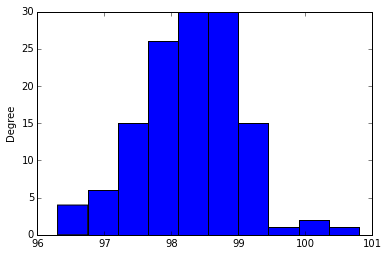

In [3]:
sample.temperature.plot(kind='hist')

##Q2: Is the true population mean really 98.6 degrees F?
### ANSWER: Yes. the true population mean is 98.6 degress F

We use the Z-test for this question. This is because our sample size is more than 30. While we do not have the population standard deviation to calculate the standard error [SE = std/sqrt(n)], we can still approximate the Z score by replacing the population standard deviation with the sample standard deviation since the sample size is more than 30.

Our hypothesis are as follows:

H0: the true population mean is 98.6 degrees F
Ha: the true population mean is not 98.6 degrees F

Using the Z-test, we calculate the p-value of the sample mean to be extremely small value, approximately p = 0.000. Therefore we accept the null hypothesis for this question.

In [43]:
se = sample.temperature.std() / ma.sqrt(len(sample.index))   # calculate standard error
z  = float(sample.temperature.mean() - 98.6) / se            # calculate z score
print scipy.special.ndtr(z)                                  # show p-value

2.45107850706e-08


##Q3: At what temperature should we consider someone's temperature to be "abnormal"?
###ANSWER: At 95% confidence level, abnormal temperatures are below 95.8 and above 100.6 degrees F. At 99.7% confidence level, abnormal temperatures are below 92.2 and above 104.2 degrees F.

In [69]:
# calculate margin of error via http://stattrek.com/estimation/margin-of-error.aspx?Tutorial=AP
me95 = st.norm.ppf(.95) * sample.temperature.std()
me99 = st.norm.ppf(.997) * sample.temperature.std()

# calculate confidence interval for 95% level
ci95r = str(sample.temperature.mean() + (2.0*me95))
ci95l = str(sample.temperature.mean() - (2.0*me95))

# calculate confidence interval for 99.7% level
ci99r = str(sample.temperature.mean() + (3.0*me99))
ci99l = str(sample.temperature.mean() - (3.0*me99))

print "at 95% confidence level, CI is between " + ci95l + " and " + ci95r
print "at 99.7% confidence level, CI is between " + ci99l + " and " + ci99r

at 95% confidence level, CI is between 95.8372728158 and 100.661188723
at 99.7% confidence level, CI is between 92.2053496679 and 104.293111871


##Q4: Is there a significant difference between males and females in normal temperature?
###ANSWER: Yes, there is significant difference between male and female normal temperature

We write our hypothesis as follow:
H0: There is no significant difference between male and female body temperature
Ha: There is significant difference between male and female body temperature

We use a z-test for this because we split the sample into male and female, both categories and 65 rows (65 male, 65 female). We assume the distribution for male and female to be normal, however even if the distribution is skewed, we have fulfilled enough sample size (n > 30).

Result: the p-value obtained is 0.02 which shows signficance, therefore we have to reject the null hypothesis that stats no difference between male and female body temperature.

In [86]:
import statsmodels.stats.weightstats as sm

male = sample[sample.gender == "M"].temperature
female = sample[sample.gender == "F"].temperature

sm.ztest(male, female)

(-2.2854345381656103, 0.02228736076065755)